In [24]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 5.5 MB/s eta 0:00:0000:0100:01


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from lightgbm import LGBMRegressor

# Load your dataset
data = pd.read_csv('TreeCoverLoss_2001-2020_ByRegion.csv')

# Extract relevant columns
data = data[['Year', 'TreeCoverLoss_ha']]
data = data.groupby('Year').sum().reset_index()  # Sum over all countries for each year

# Rename columns to match Prophet's expectations
data.rename(columns={'Year': 'ds', 'TreeCoverLoss_ha': 'y'}, inplace=True)

# Initialize the models
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=0)
ets_model = ETSModel(data['y'], error='add', trend='add', seasonal='add', seasonal_periods=4)
prophet_model = Prophet()
sarima_model = SARIMAX(data['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
lgbm_model = LGBMRegressor()

# Fit the models
adaboost_model.fit(data[['ds']], data['y'])
ets_fit = ets_model.fit()
prophet_model.fit(data)
sarima_fit = sarima_model.fit(disp=False)
lgbm_model.fit(data.index.values.reshape(-1, 1), data['y'])

# Make predictions
adaboost_pred = adaboost_model.predict(data[['ds']])
ets_pred = ets_fit.forecast(steps=len(data))
prophet_pred = prophet_model.predict(data)
sarima_pred = sarima_fit.get_forecast(steps=len(data)).predicted_mean
lgbm_pred = lgbm_model.predict(data.index.values.reshape(-1, 1))

# Calculate Mean Absolute Error
mae_adaboost = mean_absolute_error(data['y'], adaboost_pred)
mae_ets = mean_absolute_error(data['y'], ets_pred)
mae_prophet = mean_absolute_error(data['y'], prophet_pred['yhat'].values)
mae_sarima = mean_absolute_error(data['y'], sarima_pred)
mae_lgbm = mean_absolute_error(data['y'], lgbm_pred)

# Calculate Accuracy (%)
accuracy_adaboost = 100 - (mae_adaboost / data['y'].mean()) * 100
accuracy_ets = 100 - (mae_ets / data['y'].mean()) * 100
accuracy_prophet = 100 - (mae_prophet / data['y'].mean()) * 100
accuracy_sarima = 100 - (mae_sarima / data['y'].mean()) * 100
accuracy_lgbm = 100 - (mae_lgbm / data['y'].mean()) * 100

# Print Accuracy
print("Accuracy - Adaboost:", accuracy_adaboost, "%")
print("Accuracy - ETS:", accuracy_ets, "%")
print("Accuracy - Prophet:", accuracy_prophet, "%")
print("Accuracy - SARIMA:", accuracy_sarima, "%")
print("Accuracy - LightGBM:", accuracy_lgbm, "%")

# Visualization
models = ['Adaboost', 'ETS', 'Prophet', 'SARIMA', 'LightGBM']
accuracies = [accuracy_adaboost, accuracy_ets, accuracy_prophet, accuracy_sarima, accuracy_lgbm]

plt.bar(models, accuracies, color='green')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison')
plt.ylim(0, 100)  # Set y-axis limit to 0-100
plt.show()

11:58:13 - cmdstanpy - INFO - Chain [1] start processing
11:58:13 - cmdstanpy - INFO - Chain [1] done processing


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64279D+01    |proj g|=  8.99900D-01

At iterate    1    f=  1.63854D+01    |proj g|=  3.25478D-01

At iterate    2    f=  1.63531D+01    |proj g|=  2.77776D-01

At iterate    3    f=  1.63167D+01    |proj g|=  1.92117D-01

At iterate    4    f=  1.63109D+01    |proj g|=  4.64276D-02

At iterate    5    f=  1.63099D+01    |proj g|=  6.03933D-02

At iterate    6    f=  1.63087D+01    |proj g|=  4.67601D-02

At iterate    7    f=  1.63079D+01    |proj g|=  3.64246D-02

At iterate    8    f=  1.63064D+01    |proj g|=  2.20364D-01

At iterate    9    f=  1.63030D+01    |proj g|=  3.87239D-02

At iterate   10    f=  1.63006D+01    |proj g|=  1.28327D-01

At iterate   11    f=  1.62991D+01    |proj g|=  3.12623D-01

At iterate   12    f=  1.62973D+01    |proj g|=  5.03737D-02

At iterate   13    f=  1.6

/opt/anaconda/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 20, number of used features: 0
[LightGBM] [Info] Start training from score 20568684.900000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet t

In [ ]:
# Visualizing and Confusion matrix and metrics pending.

In [ ]:
#  Overfitting.  
#  mae_xgboost = mean_absolute_error(data['y'], xgboost_pred)
#  accuracy_xgboost = 100 - (mae_xgboost / data['y'].mean()) * 100
#  Accuracy - XGBoost: 99.99875512116307 %

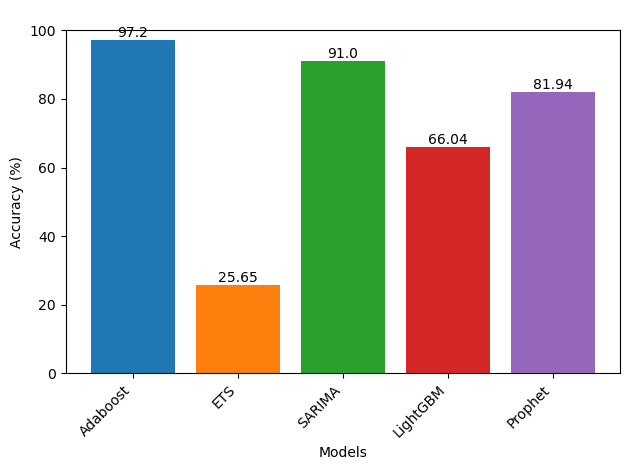

In [5]:
import matplotlib.pyplot as plt

models = ['Adaboost', 'ETS', 'SARIMA', 'LightGBM', 'Prophet']
accuracy_scores = [97.19584668828782, 25.645184577418235, 91.0006649170146, 66.03756022489098, 81.94365998447748]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create a figure and axis
fig, ax = plt.subplots()

# Set the colors for each bar
bars = ax.bar(models, accuracy_scores, color=colors)

# Set the title and labels
ax.set_title(' ')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha="right")

# Set the y-axis limits to focus on the data
plt.ylim(0, 100)

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')
plt.savefig('forestcover.eps', format='eps', bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()

